<a href="https://colab.research.google.com/github/junyong1111/KMU-2022/blob/main/Test_YOLO_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install cmake
!pip install dlib

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import dlib
import time

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import os
if not os.path.exists('darknet'):
    os.makedirs('darknet')
%cd darknet
%ls
!ls -la '/content/drive/MyDrive/Kobot/YOLO/darknet/bin/darknet'
!cp -r /content/drive/MyDrive/Kobot/YOLO/darknet/bin/darknet ./darknet
!chmod +x ./darknet
#YOLO data 가져오기
!cp -r /content/drive/MyDrive/Kobot/YOLO/darknet/weights .
!cp -r /content/drive/MyDrive/Kobot/YOLO/darknet/cfg .
!cp -ar /content/drive/MyDrive/Kobot/YOLO/darknet/data .

# Custom data가 있는 폴더 복사
#!cp -r /content/drive/MyDrive/Kobot/YOLO/darknet/backup .
!cp -r /content/drive/MyDrive/Capstone/재료/ .
!cp -r /content/drive/MyDrive/Capstone/재료.W/ .
%ls

/content/darknet
-rw------- 1 root root 6845664 Feb 15 15:12 /content/drive/MyDrive/Kobot/YOLO/darknet/bin/darknet
재료/  cfg/  darknet*  data/  재료.W/  weights/


In [ ]:
!nvidia-smi

Fri Mar 11 06:20:47 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    29W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
%cd /content/darknet

/content/darknet


In [ ]:
import cv2
import numpy as np
import time

min_confidence = 0.5
width = 800
height = 0
show_ratio = 1.0
#path = "/content/drive/MyDrive/Capstone/"
path = "/content/darknet/"
file_name = "/content/11.jpg"
Weights = path + '재료.W/' + "custom-train-yolo_12000.weights"
test_cfg = path +"cfg/custom-train-yolo.cfg"
#train_cfg = "/content/drive/MyDrive/Kobot/YOLO/darknet/cfg/yolov3.cfg"
#net = cv2.dnn.readNet("cfg", " weight")
net = cv2.dnn.readNetFromDarknet(test_cfg,Weights)


['Sweet potato', 'Mackerel', 'Chopped garlic', 'Carrot', 'Water parsley', 'Chestnuts', 'Cherry tomato', 'Pear', 'Napa cabbage', 'Ginger', 'Bread', 'Onion', 'Cucumber', 'Pepper', 'Ham']
['yolo_82', 'yolo_94', 'yolo_106']
533 800


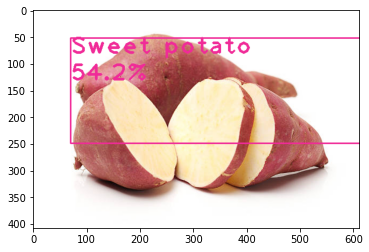

===A frame took 2.062 sec


In [ ]:
classes = []
anw = []
#with open("$path/classes.nemes" , "r") as f:
with open(path + "재료/classes.names" , "r") as f:
	classes = [line.strip() for line in f.readlines()]
print(classes)
color_lists = np.random.uniform(0, 255, size= (len(classes), 3))

layer_names = net.getLayerNames()
# print(layer_names)
output_layers = [layer_names[i[0] -1] for i in net.getUnconnectedOutLayers()]
# print(net.getUnconnectedOutLayers())
print(output_layers)

start_time = time.time()
img = cv2.imread(file_name)

h,w = img.shape[:2]
height = int(h * width / w)
print(height, width)

blob = cv2.dnn.blobFromImage(img, 0.00392, (416,416), swapRB=True, crop=False
							 )

net.setInput(blob)
outs = net.forward(output_layers)

confidences = []
names = []
boxes = []
colors = []


for out in outs:
	for detection in out:
		scores = detection[5:]
		class_id = np.argmax(scores)
		confidence = scores[class_id]
		if confidence > min_confidence:
			#print(detection)
			# Object detected
			center_x = int(detection[0] * width)
			center_y = int(detection[1] * height)
			w = int(detection[2] * width)
			h = int(detection[3] * height)

			# Rectangle coordinates
			x = int(center_x - w /2)
			y = int(center_y - h / 2)

			boxes.append([x, y, w, h])
			confidences.append(float(confidence))
			names.append(classes[class_id])
			colors.append(color_lists[class_id])

indexes = cv2.dnn.NMSBoxes(boxes, confidences, min_confidence, 0.4)



font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
	if i in indexes:
		x, y, w, h = boxes[i]
		label = str( names[i] )
		anw = (str(names[i]))
		con = (confidences[i] * 100)
		con = "{:.1f}".format(con)
	
    #print (type(con))
		color = colors[i]
		#print(i, label, color, x, y, w, h)
		cv2.rectangle(img, (x, y), (x+w, y+h), color, 2)
		cv2.putText(img, con + "%", (x, y +80), font, 3, color, 3)
		cv2.putText(img, label, (x, y + 30), font, 3, color, 3)
  		


		

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#cv2.imshow("Custom Yolo", file_name, img)
plt.show()
end_time = time.time()
process_time = end_time - start_time
print("===A frame took {:.3f} sec".format(process_time))

In [ ]:
print(label)


Sweet potato
